<h2>Sziltan 2. házi feladat</h2>

<h4>Adatok</h4>

<img src="abra.png" alt="Kep" width="450">

In [556]:
import math
import sympy as sp
import numpy as np
from sympy import cos, sin, rad, sqrt, atan
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from numpy import linspace
from IPython.display import Math

L, h, d, F, M, p, epsilon_a, epsilon_b, epsilon_c, alfa, rug_mod, Poi_teny = sp.symbols('L, h, d, F, M, p, epsilon_a, epsilon_b, epsilon_c, alfa, rug_mod, Poi_teny')
#adatok = [(L, 1.5), (h, 2.5), (d, 58), (F, 4), (M, 1.5), (p, 1.75), (epsilon_a, -3.4*10**-4), (epsilon_b, -4.5*10**-4), (epsilon_c, 3*10**-4), (alfa, 45), (rug_mod, 210000), (Poi_teny, 0.3)]
adatok = [(L, 1.5), (h, 2.5), (d, 58), (F, 4), (M, 1.5), (p, 1.75), (epsilon_a, -5.2*10**-4), (epsilon_b, 2.5*10**-4), (epsilon_c, 6*10**-4), (alfa, 30), (rug_mod, 210000), (Poi_teny, 0.3)]

<h4>1. feladat</h4>


In [557]:
A_z, B_x, B_z, M_B, C_x, C_z = symbols('A_z B_x B_z M_B C_x C_z')

F1_x = Eq(C_x, 0)
F1_z = Eq(A_z + C_z + p * L - F, 0)
M1_A = Eq(C_z * L - M - F * 2*L - (p * L) * L/2, 0)
F2_x = Eq(-C_x + B_x, 0)
F2_z = Eq(-C_z + B_z, 0)
M2_C = Eq(M_B + B_x * h, 0)

megoldas = solve((F1_x, F1_z, M1_A, F2_x, F2_z, M2_C), (A_z, B_x, B_z, M_B, C_x, C_z))

A_z = megoldas[A_z].subs(adatok)
B_x = megoldas[B_x].subs(adatok)
B_z = megoldas[B_z].subs(adatok)
M_B = megoldas[M_B].subs(adatok)
C_x = megoldas[C_x].subs(adatok)
C_z = megoldas[C_z].subs(adatok)

Math(r"A_z = " + str(A_z) + r" \quad B_x = " + str(B_x) + r" \quad B_z = " + str(B_z) + r" \quad M_B = " + str(M_B) + r" \quad C_x = " + str(C_x) + r" \quad C_z = " + str(C_z))

<IPython.core.display.Math object>

<h4>2. feladat</h4>

In [558]:
x = symbols('x')

Mh = sp.Piecewise((-M - p*x * (x/2), x<=L), (-M - p*L * (x-L/2) - A_z * (x-L), x<=L+L), (-M - p*L * (x-L/2) - A_z * (x-L) - C_z * (x-2*L), x<=L+L+L))
Mh_megold = Mh.subs(adatok)
Mh_megold

Piecewise((-0.875*x**2 - 1.5, x <= 1.5), (6.3125*x - 12.9375, x <= 3.0), (18.0 - 4.0*x, x <= 4.5))

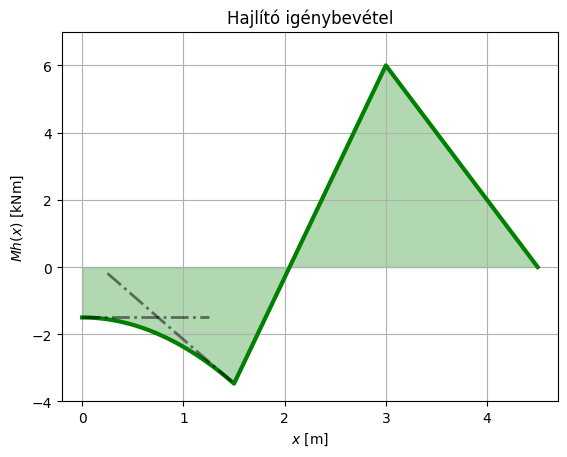

In [559]:
L1 = (L + L + L).subs(adatok)
xs = linspace(0.,float(L1),301)
erinto0_xs = linspace(0, 1.25, 100)
erinto15_xs = linspace(0.25, 1.5, 100)

dMh = sp.diff(Mh_megold, x)
erinto0 = lambda xi: float(Mh_megold.subs(x, 0).evalf()) + float(dMh.subs(x, 0).evalf()) * (xi - 0)
erinto15 = lambda xi: float(Mh_megold.subs(x, 1.5).evalf()) + float(dMh.subs(x, 1.5).evalf()) * (xi - 1.5)

Mhxs = [float(Mh_megold.subs(x, xi).evalf()) for xi in xs]
erinto0xs = [erinto0(xi) for xi in erinto0_xs]
erinto15xs = [erinto15(xi) for xi in erinto15_xs]

plt.plot(xs, Mhxs, lw=3, color='green')
plt.fill_between(xs, Mhxs, 0, color='green', alpha=0.3)
plt.plot(erinto0_xs, erinto0xs, linestyle='dashdot', lw=2, color='black', alpha=0.5)
plt.plot(erinto15_xs, erinto15xs, linestyle='dashdot', lw=2, color='black', alpha=0.5)
ax = plt.gca()
ax.set_title("Hajlító igénybevétel")
ax.set_xlabel("$x$ [m]")
ax.set_ylabel("$Mh(x)$ [kNm]")
ax.set_xlim(-0.2, 4.7)
ax.set_ylim(-4, 7)
ax.grid()
plt.savefig("hajlito")

plt.show()

In [560]:
C11, C12, C21, C22, C31, C32 = symbols('C11, C12, C21, C22, C31, C32')

x = symbols('x', real = True)

Mh1 = (-M - p*x * x/2).subs(adatok)
Mh1I = sp.integrate(Mh1, x) + C11
Mh1II = sp.integrate(Mh1I, x) + C12

Math(r"w''(x) = " + sp.latex(Mh1) + r" \quad w'(x) = " + sp.latex(Mh1I) + r" \quad w(x) = " + sp.latex(Mh1II))

<IPython.core.display.Math object>

In [561]:
x = symbols('x', real = True)

Mh2 = (-M - p*L * (x-L/2) - A_z * (x-L)).subs(adatok)
Mh2I = sp.integrate(Mh2, x) + C21
Mh2II = sp.integrate(Mh2I, x) + C22

Math(r"w''(x) = " + sp.latex(Mh2) + r" \quad w'(x) = " + sp.latex(Mh2I) + r" \quad w(x) = " + sp.latex(Mh2II))

<IPython.core.display.Math object>

In [562]:
x = symbols('x', real = True)

Mh3 = (-M - p*L * (x-L/2) - A_z * (x-L) - C_z * (x-2*L)).subs(adatok)
Mh3I = sp.integrate(Mh3, x) + C31
Mh3II = sp.integrate(Mh3I, x) + C32

Math(r"w''(x) = " + sp.latex(Mh3) + r" \quad w'(x) = " + sp.latex(Mh3I) + r" \quad w(x) = " + sp.latex(Mh3II))

<IPython.core.display.Math object>

In [563]:
Math(r"\begin{array}{l}" + sp.latex(Mh1II) + r"=" + sp.latex(0) + r"\\" + sp.latex(Mh2II) + r"=" + sp.latex(0) + r"\\" + sp.latex(Mh3II) + r"=" + sp.latex(0) + r"\\" + sp.latex(Mh1I) + r"=" + sp.latex(Mh2I) + r"\\" + sp.latex(Mh2I) + r"=" + sp.latex(Mh3I) + r"\end{array}")

<IPython.core.display.Math object>

In [564]:
elso = Eq(Mh1II.subs(x, L), 0)
masodik = Eq(Mh2II.subs(x, L), 0)
harmadik = Eq(Mh2II.subs(x, 2*L), 0)
negyedik = Eq(Mh3II.subs(x, 2*L), 0)
otodik = Eq(Mh1I.subs(x, L), Mh2I.subs(x, L))
hatodik = Eq(Mh2I.subs(x, 2*L), Mh3I.subs(x, 2*L))

megoldas = solve((elso, masodik, harmadik, negyedik, otodik, hatodik), (C11, C12, C21, C22, C31, C32))

Cee = megoldas[C11].subs(adatok)
Cek = megoldas[C12].subs(adatok)
Cke = megoldas[C21].subs(adatok)
Ckk = megoldas[C22].subs(adatok)
Che = megoldas[C31].subs(adatok)
Chk = megoldas[C32].subs(adatok)

Math(
    r"C_{11} = " + str(Cee) + r" \quad "
    r"C_{12} = " + str(Cek) + r" \quad "
    r"C_{21} = " + str(Cke) + r" \quad "
    r"C_{22} = " + str(Ckk) + r" \quad "
    r"C_{31} = " + str(Che) + r" \quad "
    r"C_{32} = " + str(Chk)
)

<IPython.core.display.Math object>

In [565]:
I_y = 77.8
hajm = (I_y * 10**-10 * rug_mod * 100).subs(adatok)

x2 = symbols('x2')
x3 = symbols('x3')

w = sp.Piecewise((-1/hajm * Mh1II.subs(x, x2), x2<=L), (-1/hajm * Mh2II.subs(x, x2), x2<=L+L), (-1/hajm * Mh3II.subs(x, x2), x2<=L+L+L))
w_megold = w.subs({
    C11: Cee, C12: Cek, C21: Cke, C22: Ckk, C31: Che, C32: Chk
}).subs(adatok)

phi = sp.Piecewise((-1/hajm * Mh1I.subs(x, x3), x3<=L), (-1/hajm * Mh2I.subs(x, x3), x3<=L+L), (-1/hajm * Mh3I.subs(x, x3), x3<=L+L+L))
phi_megold = phi.subs({
    C11: Cee, C12: Cek, C21: Cke, C22: Ckk, C31: Che, C32: Chk
}).subs(adatok)

Math(r"w(x)" + sp.latex(w_megold) + r" \quad \phi(x)" +sp.latex(phi_megold))

<IPython.core.display.Math object>

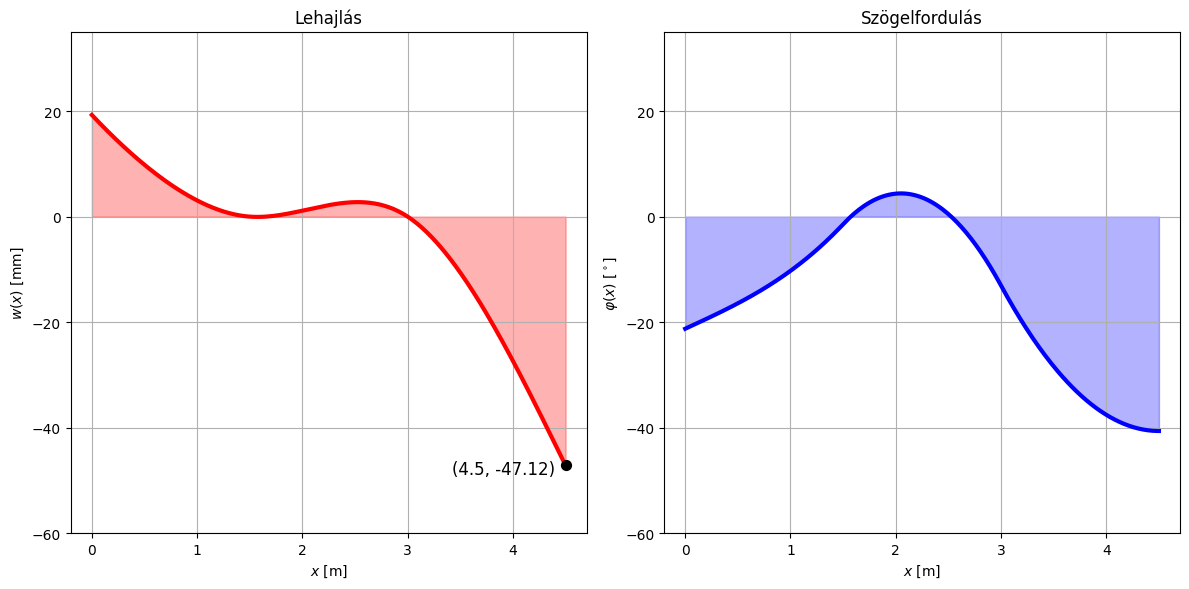

In [566]:
L2 = (L + L + L).subs(adatok)
xs = linspace(0., float(L2), 301)
xs2 = linspace(0., float(L2), 301)

wxs = [float(w_megold.subs(x2, xi).evalf()) for xi in xs]
phixs = [float(phi_megold.subs(x3, xi).evalf()) for xi in xs2]

x_max = 4.5
w_max = (-1/hajm * Mh3II.subs(x, x2)).subs({
    x2:x_max, C11: Cee, C12: Cek, C21: Cke, C22: Ckk, C31: Che, C32: Chk
}).subs(adatok)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Két soros, egy oszlopos ábra

# 1. subplot: w(x)
axs[0].plot(xs, wxs, lw=3, color='red')
axs[0].fill_between(xs, wxs, 0, color='red', alpha=0.3)
axs[0].set_title("Lehajlás")
axs[0].set_xlabel("$x$ [m]")
axs[0].set_ylabel("$w(x)$ [mm]")
axs[0].set_xlim(-0.2, 4.7)
axs[0].set_ylim(-60, 35)
axs[0].grid()
axs[0].scatter(x_max, w_max, color='black', s=50, zorder=10)
axs[0].text(x_max-0.1, w_max+1, f"({x_max}, {w_max:.2f})", fontsize=12, color='black', ha='right', va='top')
# 2. subplot: φ(x)
axs[1].plot(xs2, phixs, lw=3, color='blue')
axs[1].fill_between(xs2, phixs, 0, color='blue', alpha=0.3)
axs[1].set_title("Szögelfordulás")
axs[1].set_xlabel("$x$ [m]")
axs[1].set_ylabel(r"$\varphi(x)$ [$^\circ$]")
axs[1].set_xlim(-0.2, 4.7)
axs[1].set_ylim(-60, 35)
axs[1].grid()
plt.savefig("elmforg")

plt.tight_layout()
plt.show()

In [567]:
Math(r"x_{max} = " + str(x_max) + r" \quad w_{max} = " + str(w_max))

<IPython.core.display.Math object>

<h4>3. feladat</h4>


In [568]:
sigma_F = 240
lambda_0 = 105

lambda_F = (308 - 240)/1.14

sigma = sp.Piecewise((sigma_F, x<=lambda_F), (308-1.14*x, x<=lambda_0), ((math.pi/x)**2*rug_mod, x<=lambda_0+200))
Sigma_megold = sigma.subs(adatok)
Sigma_megold

Piecewise((240, x <= 59.6491228070175), (308 - 1.14*x, x <= 105), (2072616.92422877/x**2, x <= 305))

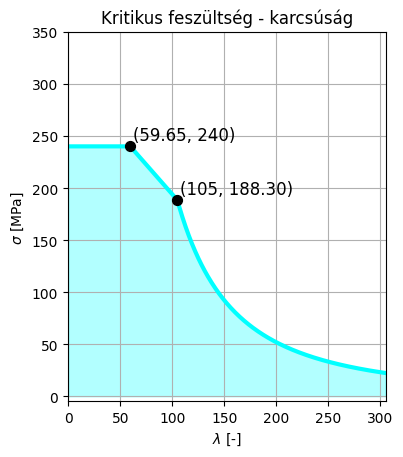

In [569]:
L = lambda_0+200
xs = linspace(0.,float(L),501)

Sigmaxs = [float(Sigma_megold.subs(x, xi).evalf()) for xi in xs]

plt.plot(xs, Sigmaxs, lw=3, color='cyan')
plt.fill_between(xs, Sigmaxs, 0, color='cyan', alpha=0.3)
ax = plt.gca()
ax.set_title("Kritikus feszültség - karcsúság")
ax.set_xlabel(r"$\lambda$ [-]")
ax.set_ylabel(r"$\sigma$ [MPa]")
ax.set_xlim(-0.2, lambda_0+200)
ax.set_ylim(-5, 350)
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.scatter(lambda_F, sigma_F, color='black', s=50, zorder=10)
plt.scatter(lambda_0, (308-1.14*lambda_0), color='black', s=50, zorder=10)
plt.text(lambda_F+2.5, sigma_F+2.5, f"({lambda_F:.2f}, {sigma_F})", fontsize=12, color='black', ha='left', va='bottom')
plt.text(lambda_0+2.5, (308-1.14*lambda_0)+2.5, f"({lambda_0}, {(308-1.14*lambda_0):.2f})", fontsize=12, color='black', ha='left', va='bottom')
plt.savefig("krfesz")

plt.show()

In [570]:
c = 2
n = 3
I_zmin = ((n * c**2 * (h*1000)**2*C_z*1000)/(rug_mod*math.pi**2)).subs(adatok)

t_min = (d - (d**4 - (64/math.pi) * I_zmin)**(1/4)).subs(adatok)/2
t_minker = (math.ceil(t_min*10)/10).subs(adatok)

A = ((d**2 - (d - 2*t_minker)**2)*math.pi/4).subs(adatok)/2
I_2 = ((d**4 - (d - 2*t_minker)**4)*math.pi/64).subs(adatok)/2
i_2 = (sqrt(I_2/A)).subs(adatok)/2
lambda_ = (c*h*1000/i_2).subs(adatok)/2

Math(r"t_{min} = " + str(t_min) + r" \quad t_{min} \approx " + str(t_minker) + r" \quad \lambda = " + str(lambda_))

<IPython.core.display.Math object>

<h4>4. feladat</h4>


In [571]:
epsilon_x = epsilon_a
epsilon_z = epsilon_c

gamma_xz = (2*(epsilon_b - epsilon_a * cos(rad(alfa))**2 - epsilon_c * sin(rad(alfa))**2)/sin(2 * rad(alfa))).subs(adatok).evalf()
epsilon_y = (- Poi_teny * (epsilon_x + epsilon_z) /(1 - Poi_teny)).subs(adatok)
epsilon_v = (epsilon_x + epsilon_y + epsilon_z).subs(adatok)

sigma_x = ((rug_mod / (1 + Poi_teny)) * (epsilon_x + (Poi_teny / (1 - 2*Poi_teny)) * epsilon_v)).subs(adatok)
sigma_z = ((rug_mod / (1 + Poi_teny)) * (epsilon_z + (Poi_teny / (1 - 2*Poi_teny)) * epsilon_v)).subs(adatok)
tau_xz = ((rug_mod / (1 + Poi_teny)) * 1/2 * gamma_xz).subs(adatok)

sigma_I = sigma_x.subs(adatok) + sigma_z.subs(adatok)
sigma_II = (sigma_x * sigma_z - tau_xz**2).subs(adatok)
sigma_III = 0

Math(r"\gamma_{xz} = " + str(gamma_xz*10**4) + r" \quad \epsilon_y = " + str(epsilon_y*10**4) + r" \quad \epsilon_v = " + str(epsilon_v*10**4) + r" \quad \sigma_x = " + str(sigma_x) + r" \quad \sigma_z = " + str(sigma_z) + r" \quad \tau_{xz} = " + str(tau_xz) + r" \quad \sigma_I = " + str(sigma_I) + r" \quad \sigma_{II} = " + str(sigma_II) + r" \quad \sigma_{III} = " + str(sigma_III))

<IPython.core.display.Math object>

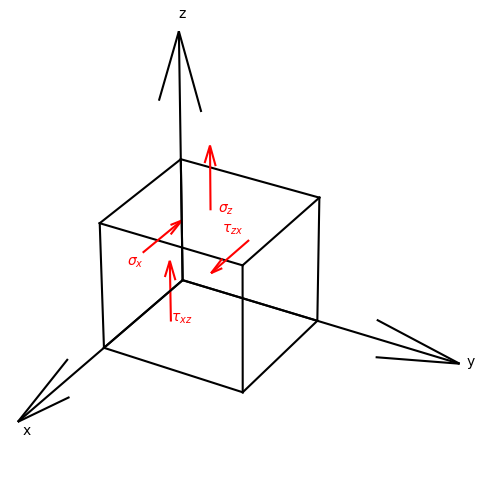

In [572]:
from itertools import product, combinations

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

r = [0, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s - e)) == 1:
        ax.plot3D(*zip(s, e), color='black')

#sigma_z
ax.quiver(0.5, 0.5, 1, 0, 0, 1, length=0.5, color='red')
ax.text(0.55, 0.5, 1, r'$\sigma_z$', color='red')
#tau_xz
ax.quiver(0.2, 0.5, 0, 0, 0, 1, length=0.5, color='red')
ax.text(0.2, 0.5, 0, r'$\tau_{xz}$', color='red')
#sigma_x
ax.quiver(0, 0.5, 0.5, 0, 1, 0, length=0.5, color='red')
ax.text(0, 0.3, 0.5, r'$\sigma_x$', color='red')
#tau_zx
ax.quiver(0.5, 1, 0.5, 0, -1, 0, length=0.5, color='red')
ax.text(0.3, 1, 0.5, r'$\tau_{zx}$', color='red')

ax.quiver(0, 1, 0, 2, 0, 0, color='black')
ax.text(2.05, 1, 0, 'y')
ax.quiver(0, 1, 0, 0, -2, 0, color='black')
ax.text(0.1, -1.1, 0, 'x')
ax.quiver(0, 1, 0, 0, 0, 2, color='black')
ax.text(0, 1, 2.1, 'z')

ax.set_box_aspect([1, 1, 1])
ax.set_xlim(-0.2, 1.5)
ax.set_ylim(-0.2, 1.6)
ax.set_zlim(-0.2, 1.7)
ax.axis('off')

plt.savefig("kocka", bbox_inches='tight', dpi=300)
plt.show()


<h4>5. feladat</h4>


In [573]:
sigma_k = (sigma_x + sigma_z)/2
R = sqrt(((sigma_x - sigma_z)/2)**2 + tau_xz**2)

sigma_1 = (sigma_k + R)
sigma_2 = 0
sigma_3 = (sigma_k - R)

phi_1 = atan((sigma_1-sigma_x)/tau_xz)

e_1 = np.array([cos(phi_1),0,sin(phi_1)])
e_2 = np.array([0, 1, 0])
e_3 = np.cross(e_1, e_2)

Math(
    r"\sigma_1 = " + str(sigma_1) +
    r"\quad \sigma_2 = " + str(sigma_2) +
    r"\quad \sigma_3 = " + str(sigma_3) +
    r"\quad e_1 = \begin{bmatrix}" + str(e_1[0]) + r"\\" + str(e_1[1]) + r"\\" + str(e_1[2]) + r"\end{bmatrix}" +
    r"\quad e_2 = \begin{bmatrix}" + str(e_2[0]) + r"\\" + str(e_2[1]) + r"\\" + str(e_2[2]) + r"\end{bmatrix}" +
    r"\quad e_3 = \begin{bmatrix}" + str(e_3[0]) + r"\\" + str(e_3[1]) + r"\\" + str(e_3[2]) + r"\end{bmatrix}"
)

<IPython.core.display.Math object>

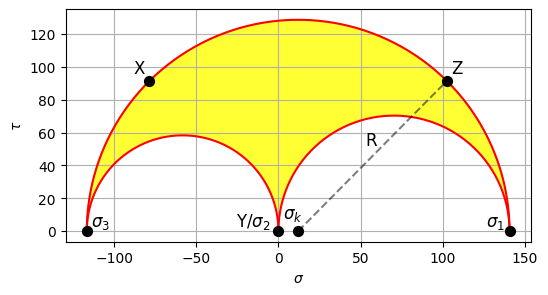

In [574]:
t = linspace(0, np.pi, 250)

x0 = np.cos(t)*(sigma_1-sigma_k) + sigma_k
y0 = np.sin(t)*(sigma_1-sigma_k)
x1 = np.cos(t)*(sigma_1/2) + sigma_1/2
y1 = np.sin(t)*(sigma_1/2)
x2 = np.cos(t)*(sigma_3/2) + sigma_3/2
y2 = -np.sin(t)*(sigma_3/2)

szin = 'red'

plt.figure(figsize=(6,6))
plt.plot(x0, y0, color=szin)
plt.plot(x1, y1, color=szin)
plt.plot(x2, y2, color=szin)
plt.fill(x0, y0, color='yellow', alpha=0.8)
plt.fill(x1, y1, color='white')
plt.fill(x2, y2, color='white')
plt.scatter(sigma_x, tau_xz, color='black', s=50, zorder=10)
plt.scatter(sigma_2, 0, color='black', s=50, zorder=10)
plt.scatter(sigma_z, tau_xz, color='black', s=50, zorder=10)
plt.scatter(sigma_1, 0, color='black', s=50, zorder=10)
plt.scatter(sigma_3, 0, color='black', s=50, zorder=10)
plt.scatter(sigma_k, 0, color='black', s=50, zorder=10)
plt.plot([sigma_k, sigma_z], [0, tau_xz], color='black', linestyle='--', alpha=0.5)
plt.text(sigma_x-2.5, tau_xz+2.5, 'X', fontsize=12, color='black', ha='right', va='bottom')
plt.text(sigma_2-5, 0, r"Y/$\sigma_2$", fontsize=12, color='black', ha='right', va='bottom')
plt.text(sigma_z+2.5, tau_xz+2.5, 'Z', fontsize=12, color='black', ha='left', va='bottom')
plt.text(sigma_1-2.5, 0, r"$\sigma_1$", fontsize=12, color='black', ha='right', va='bottom')
plt.text(sigma_3+2.5, 0, r"$\sigma_3$", fontsize=12, color='black', ha='left', va='bottom')
plt.text(sigma_k+2.5, 5, r"$\sigma_k$", fontsize=12, color='black', ha='right', va='bottom')
plt.text(60, 50, 'R', fontsize=12, color='black', ha='right', va='bottom')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\tau$")
plt.savefig("Mohr", bbox_inches='tight', dpi=300)

In [575]:
from numpy.linalg import eig

eps_mtr = np.array([[-78.462, 0, 91.399],
              [0, 0, 0],
              [91.399, 0, 102.462]])
w,v = eig(eps_mtr)

Math(r"\sigma_{1,2,3}: " + str(w[0]) + r", \quad" + str(w[1]) + r", \quad" + str(w[2]) +
    r"\quad e_1 = \begin{bmatrix}" + str(v[0][0]) + r"\\" + str(v[1][0]) + r"\\" + str(v[2][0]) + r"\end{bmatrix}" +
    r"\quad e_2 = \begin{bmatrix}" + str(v[0][1]) + r"\\" + str(v[1][1]) + r"\\" + str(v[2][1]) + r"\end{bmatrix}" +
    r"\quad e_3 = \begin{bmatrix}" + str(v[0][2]) + r"\\" + str(v[1][2]) + r"\\" + str(v[2][2]) + r"\end{bmatrix}"
)

<IPython.core.display.Math object>

<h4>6. feladat</h4>


In [576]:
sigmaMohr_e = sigma_1 - sigma_3
sigmaHMH_e = sqrt(((sigma_1 - sigma_2)**2 + (sigma_1 - sigma_3)**2 + (sigma_2 - sigma_3)**2)/2)

delta_sigma = sigmaMohr_e - sigmaHMH_e

Math(r"\sigma^{Mohr}_e = " + str(sigmaMohr_e) + r" \quad \sigma^{HMH}_e = " + str(sigmaHMH_e) + r" \quad \Delta\sigma = " + str(delta_sigma))

<IPython.core.display.Math object>

<h4>7. feladat</h4>


In [577]:
u = (sigma_x * epsilon_x + tau_xz * gamma_xz + sigma_z * epsilon_z).subs(adatok)/2
u_h = 1/6 * (sigma_I * epsilon_v).subs(adatok)

u_d = (u - u_h).subs(adatok)

Math(r"u = " + str(u) + r" \quad u_h = " + str(u_h) + r" \quad u_d = " + str(u_d))

<IPython.core.display.Math object>